In [24]:
# Summary:

# I made this code based upon Marko's code. His can be found in the email. The basic principle are the same, but I have made some key changes.
# First I removed all array slicing code and target the features directly, as mathematics make my brain hurt. I was trying to calculate which column was
# which with the code such as :2, : , etc and could not figure out anything. So I kept the feature engineering simple, using only the 
# column names to target them.

# Basically, I simplified the data preprocessing, as I felt the previous processing of the data might have been overly complex, which increases chances of error
# while handling the data.

# I ploted the dataframe for outliers and it seems the dataset has quite a few outliers (see the plot below). So using standard or minmax scaler here would not normalize the 
# data to a representative form. Hence I used RobustScaler which is robust to outliers.

In [2]:
# Data Loading and Initial Exploration

In [3]:
import pandas as pd

df = pd.read_csv("http://users.jyu.fi/~olkhriye/ties4911/demos/demo1/Automobile_price_data_Raw_set.csv")
df.head()

C:\Users\galaxy\AppData\Local\Temp\ipykernel_15416\1332310547.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
#Getting some info about the dataset (shape, data types, missing values).

print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# I select the relevant features and target feature here

features = ['make', 'body-style', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'highway-mpg']
target = 'price'
data = df[features + [target]]
data.head(10)

,make,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price
0,alfa-romero,convertible,88.6,130,111.0,5000.0,27,13495.0
1,alfa-romero,convertible,88.6,130,111.0,5000.0,27,16500.0
2,alfa-romero,hatchback,94.5,152,154.0,5000.0,26,16500.0
3,audi,sedan,99.8,109,102.0,5500.0,30,13950.0
4,audi,sedan,99.4,136,115.0,5500.0,22,17450.0
5,audi,sedan,99.8,136,110.0,5500.0,25,15250.0
6,audi,sedan,105.8,136,110.0,5500.0,25,17710.0
7,NaN,wagon,105.8,136,110.0,5500.0,25,18920.0
8,audi,sedan,105.8,131,140.0,5500.0,20,23875.0
9,audi,hatchback,99.5,131,160.0,5500.0,22,NaN


In [6]:
# drop missing NaN values
data = data.dropna()
data.head(10)

,make,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price
0,alfa-romero,convertible,88.6,130,111.0,5000.0,27,13495.0
1,alfa-romero,convertible,88.6,130,111.0,5000.0,27,16500.0
2,alfa-romero,hatchback,94.5,152,154.0,5000.0,26,16500.0
3,audi,sedan,99.8,109,102.0,5500.0,30,13950.0
4,audi,sedan,99.4,136,115.0,5500.0,22,17450.0
5,audi,sedan,99.8,136,110.0,5500.0,25,15250.0
6,audi,sedan,105.8,136,110.0,5500.0,25,17710.0
8,audi,sedan,105.8,131,140.0,5500.0,20,23875.0
10,bmw,sedan,101.2,108,101.0,5800.0,29,16430.0
11,bmw,sedan,101.2,108,101.0,5800.0,29,16925.0


In [7]:
# OneHotEncoding the values here, I isolate the categorical features when doing this

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
categorical_features = data[['make', 'body-style']]
encoded_features = enc.fit_transform(categorical_features)

print('Categories:\n', enc.categories_)
print('Encoded Catagorial Features:\n', encoded_features)

Categories:
 [array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object), array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object)]
Encoded Catagorial Features:
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


C:\Users\galaxy\anaconda3\envs\DeepWork\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# merging the encoded categorical features with numerical features and preparing for model input. Used numpy array, same as Marko

import numpy as np

numerical_features = data[features[2:]].to_numpy()
X = np.hstack((encoded_features, numerical_features))

print(X)

[[1.00e+00 0.00e+00 0.00e+00 ... 1.11e+02 5.00e+03 2.70e+01]
 [1.00e+00 0.00e+00 0.00e+00 ... 1.11e+02 5.00e+03 2.70e+01]
 [1.00e+00 0.00e+00 0.00e+00 ... 1.54e+02 5.00e+03 2.60e+01]
 ...
 [0.00e+00 0.00e+00 0.00e+00 ... 1.34e+02 5.50e+03 2.30e+01]
 [0.00e+00 0.00e+00 0.00e+00 ... 1.06e+02 4.80e+03 2.70e+01]
 [0.00e+00 0.00e+00 0.00e+00 ... 1.14e+02 5.40e+03 2.50e+01]]


In [9]:
# converting data type to correct float32 type

Y = data[target].astype('float32').to_numpy()
print(Y)

[13495. 16500. 16500. 13950. 17450. 15250. 17710. 23875. 16430. 16925.
 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  6575.  5572.
  6377.  7957.  6229.  7609.  8558.  8921. 12964.  6479.  6855.  5399.
  6529.  7129.  7295.  7295.  7895.  9095.  8845. 10295. 12945. 10345.
  6785. 11048. 32250. 35550. 36000.  5195.  6095.  6795.  6695.  7395.
 10945. 11845. 13645. 15645.  8845.  8495. 10595. 10245. 10795. 11245.
 18280. 18344. 25552. 28248. 28176. 31600. 34184. 35056. 40960. 45400.
 16503.  5389.  6669.  7689.  9959.  8499. 12629. 14869. 14489.  6989.
  8189.  9279.  9279.  5499.  7099.  6849.  7349.  7299.  7799.  7499.
  7999.  8249.  8949.  9549. 13499. 14399. 13499. 17199. 19699. 18399.
 11900. 13200. 12440. 13860. 15580. 16900. 16695. 17075. 16630. 17950.
 18150.  5572.  7957.  6229.  6692.  7609.  8921. 12764. 22018. 32528.
 34028. 37028. 11850. 12170. 15040. 15510. 18150. 18620.  5118.  7053.
  7603.  7126.  7775.  9960.  9233. 11259.  7463. 10198.  8013. 11694.
  5348

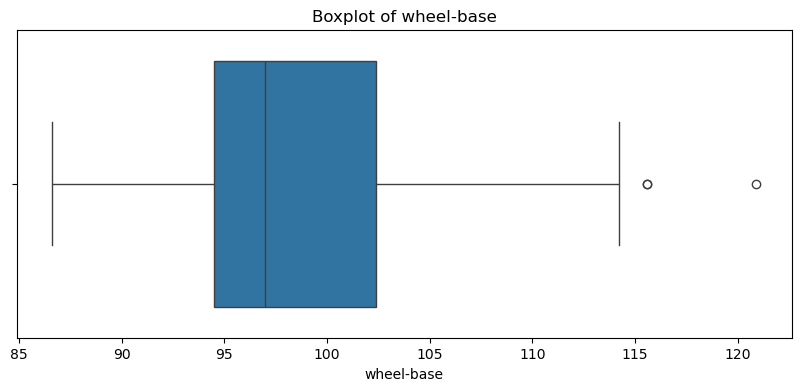

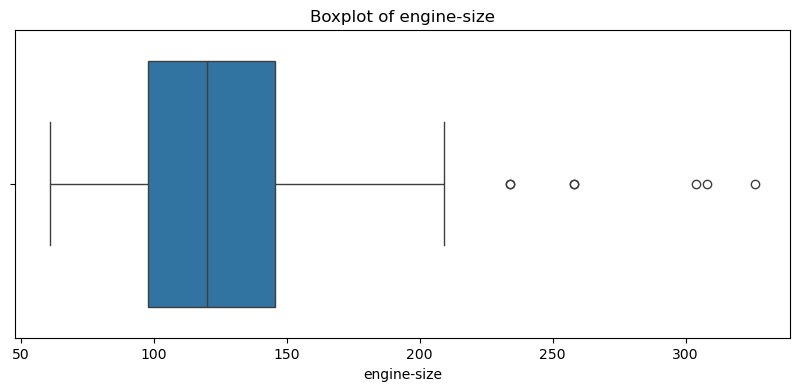

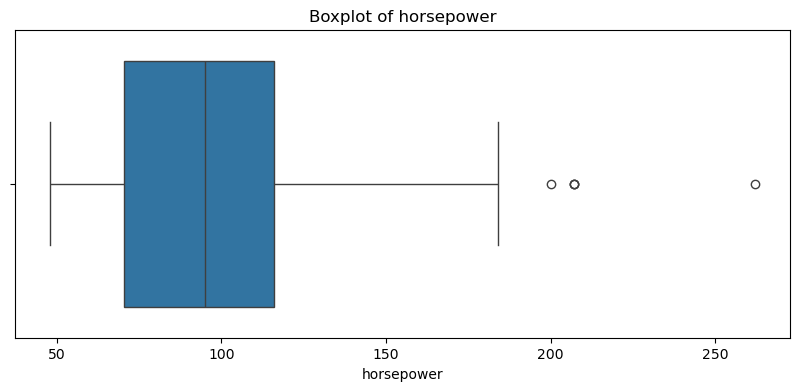

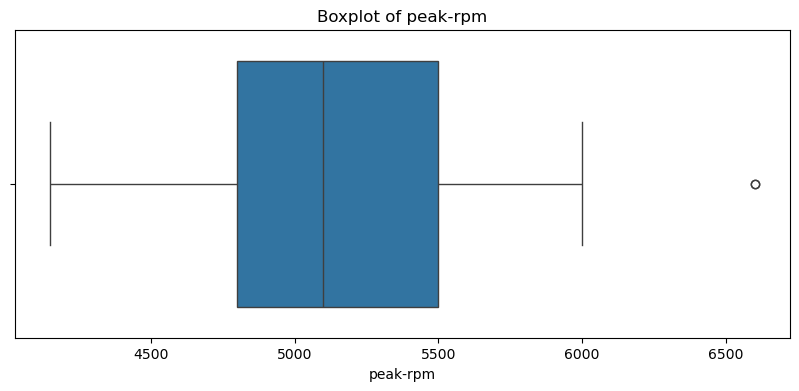

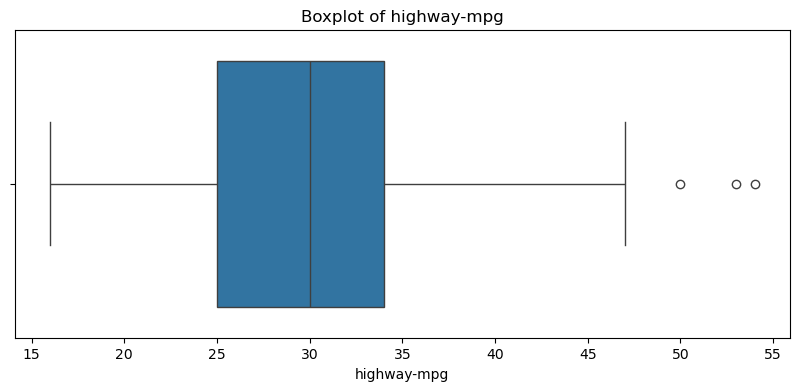

In [10]:
# check for outliers in numerical features. Used box plot. It seems like there are quite some outliers which may affect the scaling.

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'highway-mpg']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [11]:
# split data before training to tackle data leakage 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [12]:
# I use RobustScaler() here, because in the previous plot I had seem quite a few outlier hotspots

from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# importing mse

from sklearn.metrics import mean_squared_error

In [14]:
# I am doing keras first. Simple deep layer, with the same hyperparameters as the one Marko used but 
# fixed layer connection as previously, the output was connected to the input directly without the hidden layer


from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(X_train.shape[1],))
hidden = Dense(64, activation='relu')(input_layer)
output_layer = Dense(1)(hidden)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [15]:
# fitting the model

model.fit(X_train, Y_train, batch_size=10, epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 2ms/step - loss: 265286128.0000
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 264992144.0000
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 264422384.0000
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 263373376.0000
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 261736560.0000
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 259540576.0000
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 256534960.0000
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 253080960.0000
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 248694848.0000
Epoch 10/200
16/16 [==============================] - 0s 3ms/step - loss: 243542432.0000
Epoch 11/200
16/16 [==============================] - 0s 3ms/step - loss: 237779904.0000
Epoch 12/200
16/16 [==========

In [16]:
# checking the mse. it is 5782519.0 which is totally whack O.o

pred_test_keras = model.predict(X_test).flatten()
mse_keras = mean_squared_error(Y_test, pred_test_keras)
print(f'Keras MSE: {mse_keras}')

2/2 [==============================] - 0s 4ms/step
Keras MSE: 5702014.0


In [17]:
# prep test dataset. same code as Marko's 

X_task = np.array(['audi', 'hatchback', 99.5, 131, 160, 5500, 22]).reshape(1, -1)
X_task_categs = enc.transform(X_task[:, :2]).astype('float32')
X_task_encoded = np.concatenate((X_task_categs, X_task[:, 2:].astype('float32')), axis=1)
X_task_scaled = scaler.transform(X_task_encoded)
print('X_task_categs\n:', X_task_categs)
print('X_task_encoded\n:', X_task_encoded)
print('X_task_scaled\n:', X_task_scaled)

X_task_categs
: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0.]]
X_task_encoded
: [[0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  0.00e+00 0.00e+00 9.95e+01 1.31e+02 1.60e+02 5.50e+03 2.20e+01]]
X_task_scaled
: [[ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.29113925  0.21782178  1.2857143   0.5714286
  -0.8888889 ]]


C:\Users\galaxy\anaconda3\envs\DeepWork\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [18]:
# prediction using it. the result price seems probable

task_predict_keras = model.predict(X_task_scaled)[0][0]
print(f'Predictions:\nKeras: {task_predict_keras}')

1/1 [==============================] - 0s 35ms/step
Predictions:
Keras: 19317.6875


In [19]:
# Scikit Learn Model

In [20]:
# LinearRegression here as specified in task. trained as regressor

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [21]:
# getting the mse for regressor. 3900213 @.@

pred_test_sk = regressor.predict(X_test)
mse_scikit = mean_squared_error(Y_test, pred_test_sk)
print(f'Scikit-learn MSE: {mse_scikit}')

Scikit-learn MSE: 3900213.6494645798


In [22]:
#predicted price is 20767.398718852684 which seems probable.

task_predict_scikit = regressor.predict(X_task_scaled)[0]
print(f'Predictions:\nScikit-learn: {task_predict_scikit}')

Predictions:
Scikit-learn: 20767.398718852684
